In [1]:
import pandas as pd
np=pd.np
from sdd_api.api import Api
from credentials import *
import matplotlib.pyplot as plt
%matplotlib inline
api = Api(username=username, password=password, client_id=client_id, client_secret=client_secret)

# Overview  
For now, this notebook just covers how to use our new drives and game info tables. In the future we'll add more advanced commands and datasets

## Drives

In [68]:
drives=api.get_dataframe('drives', season_start=2016)
drives.sample(4)

,drive_num,end_event,net_yds,num_plays,quarter,start_at,time_start,time_total,matchup_id,season,team_name,drive_time
652,7,Field Goal,31,10,3,NaN,14:04,4:40,20170917TEN@JAC,2017,TEN,280
4652,1,Field Goal,71,7,1,NaN,15:00,3:24,20171217NYJ@NO,2017,NO,204
1801,7,Touchdown,17,2,3,NaN,14:07,0:08,20171012PHI@CAR,2017,PHI,8
2459,5,Punt,9,3,2,NaN,08:17,1:57,20171023WAS@PHI,2017,WAS,117


In [69]:
#Calculate time of position and 
drive_features=drives.groupby(["matchup_id","team_name"], as_index=False).agg(sum)[['team_name','matchup_id','drive_time','num_plays','net_yds']]
drive_features['drive_time(m)']=drive_features['drive_time']/60
drive_features.sample(10)

,team_name,matchup_id,drive_time,num_plays,net_yds,drive_time(m)
383,LAC,20171001PHI@LAC,1242,54,420,20.700000
495,CLE,20171029MIN@CLE,1430,65,295,23.833333
500,PIT,20171029PIT@DET,1703,62,412,28.383333
352,WAS,20170924OAK@WAS,2552,81,459,42.533333
641,BUF,20171210IND@BUF,1945,68,311,32.416667
78,WAS,20161002CLE@WAS,1964,66,383,32.733333
306,CLE,20170917CLE@BAL,1596,67,367,26.600000
110,GB,20161016DAL@GB,1810,70,407,30.166667
225,TEN,20161211DEN@TEN,1947,67,233,32.450000
394,TB,20171005NE@TB,1750,71,414,29.166667


In [70]:
drive_features['yards_per_play']=drive_features['net_yds']/drive_features['num_plays']
drive_features.groupby("team_name").agg([np.min, np.max, np.median,np.average])[['yards_per_play','drive_time(m)']]

yards_per_play                               drive_time(m)  \
                    amin      amax    median   average          amin   
team_name                                                              
ARI             3.770833  7.220588  4.973509  5.183810     20.983333   
ATL             4.656250  8.161765  5.913793  6.192612     25.600000   
BAL             3.388060  6.633803  4.464286  4.609729     23.366667   
BUF             2.923077  7.185185  4.823129  4.901608     20.516667   
CAR             3.214286  7.638889  4.670177  4.945843     27.250000   
CHI             2.411765  7.059701  4.621212  4.900761     21.216667   
CIN             3.607843  8.578125  4.896859  5.107241     19.766667   
CLE             3.285714  5.877193  4.775862  4.705260     23.083333   
DAL             3.484848  7.452830  5.597278  5.486538     23.750000   
DEN             3.015873  6.112360  4.906926  4.797677     24.100000   
DET             3.394366  6.469136  5.025424  5.184963     24.616667   
GB              3.369231  7.211538  5.360537  5.244443     23.083333   
HOU             3.579710  7.549296  4.645569  5.022476     21.716667   
IND             3.164179  6.571429  5.103348  4.961806     23.150000   
JAC             3.037037  7.895522  5.055275  5.172175     25.350000   
KC              3.000000  8.151515  5.620000  5.468358     23.350000   
LAC             4.291667  7.777778  5.537037  5.663369     20.700000   
LAR             2.114754  7.343750  5.400916  5.168676     20.800000   
MIA             2.833333  6.523810  4.943662  4.916933     23.866667   
MIN             3.566667  7.569231  5.181573  5.250308     22.966667   
NE              4.207547  7.454545  5.935065  5.942971     23.816667   
NO              4.202703  8.188406  6.111923  6.163011     20.633333   
NYG             2.508772  6.787879  4.772727  4.914917     22.466667   
NYJ             3.491228  5.972603  5.000000  4.964662     21.600000   
OAK             2.120000  7.518519  5.492537  5.424004     21.900000   
PHI             2.507463  6.890625  5.272368  5.181128     25.500000   
PIT             4.362319  7.875000  5.562698  5.678998     25.383333   
SEA             2.433962  7.272727  5.366422  5.275270     19.716667   
SF              3.400000  7.627119  4.820513  4.956418     23.033333   
TB              2.790323  6.872727  4.906250  5.103237     22.233333   
TEN             2.525424  7.515625  5.278689  5.260838     20.316667   
WAS             3.716667  8.109375  5.523810  5.592210     22.850000   

                                            
                amax     median    average  
team_name                                   
ARI        46.350000  32.225000  31.581061  
ATL        36.250000  31.866667  31.392754  
BAL        38.600000  32.366667  31.665079  
BUF        40.550000  28.258333  28.846970  
CAR        38.883333  32.691667  32.912121  
CHI        38.850000  29.400000  29.613492  
CIN        41.066667  29.016667  29.260606  
CLE        36.250000  28.150000  28.499206  
DAL        37.483333  32.833333  31.765152  
DEN        38.333333  31.100000  31.762500  
DET        36.916667  29.775000  30.334167  
GB         39.600000  28.950000  30.105303  
HOU        41.416667  31.933333  31.924242  
IND        37.283333  29.975000  29.736667  
JAC        41.850000  32.475000  32.244697  
KC         38.283333  30.533333  31.668116  
LAC        42.533333  31.750000  31.301587  
LAR        39.016667  30.516667  30.633333  
MIA        37.033333  30.066667  30.440476  
MIN        39.783333  33.808333  32.801667  
NE         37.950000  29.766667  30.797101  
NO         41.383333  31.491667  31.200000  
NYG        34.216667  29.500000  28.953175  
NYJ        42.816667  30.050000  30.961905  
OAK        41.466667  30.933333  30.261111  
PHI        40.533333  34.841667  33.460000  
PIT        36.650000  32.441667  31.834848  
SEA        37.483333  31.075000  31.010606  
SF         34.450000  30.283333  28.850000  
TB         41.150000  30.216667  30.295238  
TEN 

### Taking Drive Features and Creating In Season Stats

In [71]:
team_game_logs=api.get_dataframe("team_game_logs", season_start=2016)

In [72]:
team_game_logs=team_game_logs[(team_game_logs['game_type']=='Regular')&(team_game_logs['season']==2016)]

In [73]:
#we're working to add matchup id and ensure the api knows the proper format.
#for now use this
def matchup_id(row):
    if row['game_location'] is None:
        home_name=row['team_name']
        away_name=row['opp_name']
    else:
        home_name=row['opp_name']
        away_name=row['team_name']
    return str(row['season'])+row['game_datetime'].strftime("%m%d")+"%s@%s"%(away_name, home_name)
team_game_logs['game_datetime']=pd.to_datetime(team_game_logs['game_datetime']*1000000)
team_game_logs['matchup_id']=team_game_logs.apply(matchup_id, axis=1)

In [78]:
team_features=[]
#we'll create team level stats past on current season performance
for team_name, team_games in team_game_logs.groupby(["team_name"]):
    for week_num in team_games['week_num'].unique():
        in_season_games=team_games[team_games['week_num']<week_num]
        if len(in_season_games)<1:
            continue#could handle using last season stats
        matchup_ids=in_season_games['matchup_id'].unique()
        team_drives=drives[(drives['matchup_id'].isin(matchup_ids))&(drives['team_name']==team_name)]
        
        features={}
        drive_agg=team_drives.agg([np.mean,np.sum])
        features['average_drive_time']=drive_agg.loc['mean']['drive_time']
        totals=team_drives.agg(np.sum)
        features['time_of_posession']=totals['drive_time']
        features['yards_per_play']=totals['net_yds']/totals['num_plays']
        features['matchup_id']=team_games[team_games['week_num']==week_num]['matchup_id'].iloc[0]
        features['team_name']=team_name
        team_features.append(features)
team_features_df=pd.DataFrame(team_features).dropna()
team_features_df.sample(10)

,average_drive_time,matchup_id,team_name,time_of_posession,yards_per_play
407,169.160000,20161002SEA@NYJ,SEA,4229.0,4.851351
431,131.129870,20161211NYJ@SF,SF,10097.0,5.060680
174,175.890909,20161128GB@PHI,GB,9674.0,5.806180
462,156.855422,20161218TEN@KC,TEN,13019.0,5.747277
342,138.011236,20161218DET@NYG,NYG,12283.0,5.430085
228,168.913043,20161016KC@OAK,KC,3885.0,5.242857
142,151.786885,20161106DEN@OAK,DEN,9259.0,5.172515
151,174.900000,20160925DET@GB,DET,1749.0,4.550725
361,178.636364,20160925OAK@TEN,OAK,1965.0,6.569444
19,158.880000,20161016ATL@SEA,ATL,3972.0,6.723881


You can take "team_features_df" and merge with the matchups table to make predictions. You can also add home/away information by using the team_game_logs table or the matchups table

### Game Info  
We've added a game info table. For now it just contains weather and grass information.

In [80]:
game_info=api.get_dataframe("game_info")
game_info.sample(10)

,surface,humidity,temperature,wind,matchup_id
276,field_turf,34.0,41.0,18.0,20120120BAL@NE
1602,sport_turf,NaN,NaN,NaN,20161224TB@NO
721,field_turf,NaN,NaN,NaN,20131124TB@DET
889,grass,30.0,71.0,10.0,20141005PIT@JAC
695,grass,36.0,44.0,3.0,20131114IND@TEN
451,grass,65.0,34.0,10.0,20121125PIT@CLE
1348,grass,7.0,52.0,NaN,20160101HOU@TEN
663,field_turf,45.0,57.0,3.0,20131027NYJ@CIN
1315,grass,63.0,52.0,14.0,20151220CIN@SF
469,astro_turf,NaN,NaN,NaN,20121202SF@LAR


We're going to show how you can use this data to see which team plays in the coldest weather.

In [81]:
team_games_with_weather=team_game_logs.merge(game_info)
team_games_with_weather

,season,team_name,full_game_type,opp_first_downs,team_first_downs,game_location,game_outcome,game_time,opp_pass_yds,team_pass_yds,...,game_type,week_num,opp_name,had_overtime,game_datetime,matchup_id,surface,humidity,temperature,wind
0,2016,ARI,Week 1,19.0,21.0,None,L,7:30PM ET,257.0,252.0,...,Regular,1,NE,False,2016-09-11 19:30:00,20160911NE@ARI,grass,NaN,NaN,NaN
1,2016,NE,Week 1,21.0,19.0,@,W,7:30PM ET,252.0,257.0,...,Regular,1,ARI,False,2016-09-11 19:30:00,20160911NE@ARI,grass,NaN,NaN,NaN
2,2016,ATL,Week 1,20.0,19.0,None,L,1:05PM ET,281.0,322.0,...,Regular,1,TB,False,2016-09-11 13:05:00,20160911TB@ATL,field_turf,NaN,NaN,NaN
3,2016,TB,Week 1,19.0,20.0,@,W,1:05PM ET,322.0,281.0,...,Regular,1,ATL,False,2016-09-11 13:05:00,20160911TB@ATL,field_turf,NaN,NaN,NaN
4,2016,BAL,Week 1,11.0,18.0,None,W,1:04PM ET,95.0,225.0,...,Regular,1,BUF,False,2016-09-11 13:04:00,20160911BUF@BAL,grass,44.0,84.0,8.0
5,2016,BUF,Week 1,18.0,11.0,@,L,1:04PM ET,225.0,95.0,...,Regular,1,BAL,False,2016-09-11 13:04:00,20160911BUF@BAL,grass,44.0,84.0,8.0
6,2016,CAR,Week 1,21.0,21.0,@,L,8:40PM ET,159.0,176.0,...,Regular,1,DEN,False,2016-09-08 20:40:00,20160908CAR@DEN,grass,12.0,85.0,10.0
7,2016,DEN,Week 1,21.0,21.0,None,W,8:40PM ET,176.0,159.0,...,Regular,1,CAR,False,2016-09-08 20:40:00,20160908CAR@DEN,grass,12.0,85.0,10.0
8,2016,CHI,Week 1,17.0,14.0,@,L,1:05PM ET,215.0,185.0,...,Regular,1,HOU,False,2016-09-11 13:05:00,20160911CHI@HOU,field_turf,NaN,NaN,NaN
9,2016,HOU,Week 1,14.0,17.0,None,W,1:05PM ET,185.0,215.0,...,Regular,1,CHI,False,2016-09-11 13:05:00,20160911CHI@HOU,field_turf,NaN,NaN,NaN


In [82]:
weather_stats=team_games_with_weather[['team_name','humidity','temperature','wind']].groupby("team_name").agg([np.mean,np.min,np.max])
weather_stats

humidity             temperature                   wind           
                mean amin   amax        mean  amin  amax       mean amin  amax
team_name                                                                     
ARI        25.166667  0.0   53.0   66.500000  39.0  85.0   9.666667  5.0  16.0
ATL        22.857143  1.0   83.0   65.714286  54.0  79.0   7.333333  5.0  10.0
BAL        26.857143  0.0   84.0   59.214286  31.0  88.0   7.833333  2.0  16.0
BUF        33.750000  4.0   92.0   55.500000  26.0  91.0  10.125000  5.0  22.0
CAR        19.857143  2.0   63.0   63.071429  32.0  85.0   5.200000  0.0  10.0
CHI        35.454545  1.0   93.0   51.181818  11.0  84.0   8.000000  5.0  12.0
CIN        36.500000  2.0   90.0   53.928571  24.0  81.0   6.714286  2.0  17.0
CLE        38.937500  1.0   91.0   55.750000  26.0  86.0  10.125000  1.0  16.0
DAL        29.857143  0.0   65.0   59.142857  32.0  81.0   8.000000  6.0  10.0
DEN        21.933333  5.0   63.0   64.866667  18.0  88.0   6.125000  3.0  10.0
DET        56.333333  1.0   84.0   63.000000  55.0  72.0  11.500000  6.0  17.0
GB         26.000000  0.0   84.0   49.384615  11.0  90.0   9.000000  3.0  17.0
HOU        18.000000  6.0   60.0   59.166667  32.0  71.0   4.500000  4.0   5.0
IND        24.333333  6.0   59.0   62.500000  45.0  85.0   5.333333  4.0   7.0
JAC        33.307692  0.0   93.0   70.000000  42.0  90.0   5.857143  3.0   8.0
KC         31.923077  5.0  100.0   50.615385   1.0  74.0   7.800000  6.0   9.0
LAC        27.230769  5.0   73.0   67.692308  37.0  85.0   7.666667  6.0   9.0
LAR        20.307692  0.0   61.0   65.307692  36.0  91.0   8.200000  3.0  17.0
MIA        34.437500  3.0   79.0   70.125000  35.0  88.0  10.142857  2.0  16.0
MIN        35.285714  5.0   71.0   63.142857  37.0  80.0   9.250000  0.0  20.0
NE         35.666667  3.0   92.0   53.400000  18.0  80.0  10.000000  4.0  14.0
NO         34.833333  0.0   74.0   72.333333  63.0  80.0   7.333333  5.0   9.0
NYG        25.071429  0.0   74.0   52.928571  32.0  80.0   6.400000  2.0  12.0
NYJ        33.071429  5.0   91.0   55.714286  35.0  80.0  10.166667  0.0  17.0
OAK        31.466667  4.0  100.0   63.266667  21.0  89.0   6.428571  2.0  15.0
PHI        21.285714  3.0   62.0   58.357143  35.0  85.0  11.800000  5.0  20.0
PIT        39.066667  1.0   86.0   54.466667  24.0  81.0   8.285714  4.0  15.0
SEA        26.357143  2.0   83.0   54.357143  26.0  88.0   4.200000  0.0  10.0
SF         30.428571  0.0   63.0   65.000000  33.0  82.0  11.428571  4.0  22.0
TB         25.166667  2.0   63.0   76.250000  46.0  91.0   7.600000  4.0  15.0
TEN        29.923077  3.0   78.0   62.230769   1.0  89.0   6.666667  2.0  15.0
WAS        36.923077  1.0   90.0   56.307692  32.0  81.0   6.285714  1.0  16.0

In [83]:
#pandas has a great rank function that ranks a dataframe in ascending order.
weather_rankings=weather_stats.rank()
weather_rankings

humidity             temperature              wind            
              mean  amin  amax        mean  amin  amax  mean  amin  amax
team_name                                                               
ARI            9.5   5.0   1.0        27.0  26.0  18.0  24.0  25.5  21.0
ATL            6.0  12.5  17.5        26.0  30.0   4.0  12.5  25.5   9.0
BAL           13.0   5.0  20.0        16.0  13.0  23.5  17.0   9.5  21.0
BUF           22.0  24.5  27.5         9.0  11.0  31.0  26.5  25.5  31.5
CAR            2.0  17.5   7.5        20.0  16.0  18.0   3.0   2.5   9.0
CHI           26.0  12.5  29.5         3.0   3.5  15.0  18.5  25.5  12.5
CIN           28.0  17.5  23.5         6.0   8.5  11.5  11.0   9.5  26.0
CLE           30.0  12.5  25.5        11.0  11.0  21.0  26.5   5.5  21.0
DAL           15.0   5.0  10.0        14.0  16.0  11.5  18.5  30.5   9.0
DEN            5.0  28.0   7.5        23.0   5.5  23.5   6.0  14.5   9.0
DET           32.0  12.5  20.0        19.0  31.0   2.0  31.0  30.5  26.0
GB            11.0   5.0  20.0         1.0   3.5  28.5  22.0  14.5  26.0
HOU            1.0  31.5   3.0        15.0  16.0   1.0   2.0  19.5   1.0
IND            7.0  31.5   2.0        18.0  28.0  18.0   4.0  19.5   2.0
JAC           21.0   5.0  29.5        29.0  27.0  28.5   5.0  14.5   3.0
KC            19.0  28.0  31.5         2.0   1.5   3.0  16.0  30.5   5.0
LAC           14.0  28.0  12.0        28.0  24.5  18.0  15.0  30.5   5.0
LAR            3.0   5.0   4.0        25.0  23.0  31.0  20.0  14.5  26.0
MIA           23.0  21.5  16.0        30.0  21.0  23.5  28.0   9.5  21.0
MIN           25.0  28.0  11.0        21.0  24.5   7.0  23.0   2.5  29.5
NE            27.0  21.5  27.5         5.0   5.5   7.0  25.0  19.5  14.0
NO            24.0   5.0  13.5        31.0  32.0   7.0  12.5  25.5   5.0
NYG            8.0   5.0  13.5         4.0  16.0   7.0   8.0   9.5  12.5
NYJ           20.0  28.0  25.5        10.0  21.0   7.0  29.0   2.5  26.0
OAK           18.0  24.5  31.5        22.0   7.0  26.5   9.0   9.5  16.5
PHI            4.0  21.5   5.0        13.0  21.0  18.0  32.0  25.5  29.5
PIT           31.0  12.5  22.0         8.0   8.5  11.5  21.0  19.5  16.5
SEA           12.0  17.5  17.5         7.0  11.0  23.5   1.0   2.5   9.0
SF            17.0   5.0   7.5        24.0  19.0  14.0  30.0  19.5  31.5
TB             9.5  17.5   7.5        32.0  29.0  31.0  14.0  19.5  16.5
TEN           16.0  21.5  15.0        17.0   1.5  26.5  10.0   9.5  16.5
WAS           29.0  12.5  23.5        12.0  16.0  11.5   7.0   5.5  21.0

In [84]:
weather_rankings['wind']

,mean,amin,amax
team_name,,,
ARI,24.0,25.5,21.0
ATL,12.5,25.5,9.0
BAL,17.0,9.5,21.0
BUF,26.5,25.5,31.5
CAR,3.0,2.5,9.0
CHI,18.5,25.5,12.5
CIN,11.0,9.5,26.0
CLE,26.5,5.5,21.0
DAL,18.5,30.5,9.0


In [85]:
from IPython.display import display
def showRankings(col):
    bottom_5=weather_rankings[weather_rankings[col]['mean']<=5][col]
    top_5=weather_rankings[weather_rankings[col]['mean']>(weather_rankings[col]['mean'].max()-5)][col]
    combined=pd.concat([bottom_5, top_5])
    display(combined[['mean']].sort_values(by="mean").rename(columns={"mean": col}))
for col in['humidity','temperature','wind']:
    showRankings(col)

,humidity
team_name,
HOU,1.0
CAR,2.0
LAR,3.0
PHI,4.0
DEN,5.0
CIN,28.0
WAS,29.0
CLE,30.0
PIT,31.0


,temperature
team_name,
GB,1.0
KC,2.0
CHI,3.0
NYG,4.0
NE,5.0
LAC,28.0
JAC,29.0
MIA,30.0
NO,31.0


,wind
team_name,
SEA,1.0
HOU,2.0
CAR,3.0
IND,4.0
JAC,5.0
MIA,28.0
NYJ,29.0
SF,30.0
DET,31.0


Surprisingly, Chicago is 3rd and Kansas City is ranked 2nd for coldest. NOTE, this uses all games played, not just home games.

# Scoring vs Weather  


In [86]:
matchups=api.get_dataframe("matchups")
matchups['total_pts']=matchups['home_pts']+matchups['away_pts']
weather_matchups=matchups.merge(game_info)

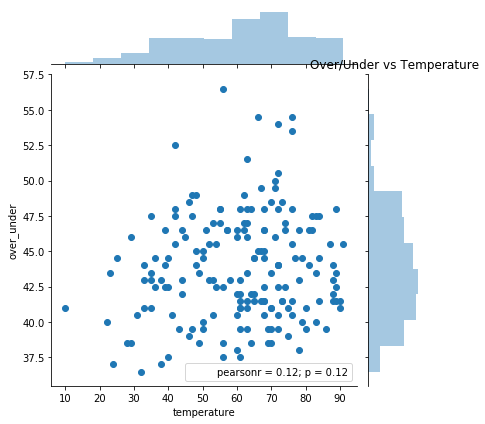

In [87]:
import seaborn as sns
sns.jointplot(data=weather_matchups, x="temperature", y="over_under")
plt.title("Over/Under vs Temperature")

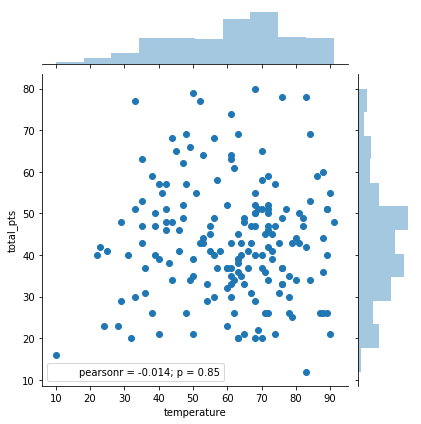

In [88]:
sns.jointplot(data=weather_matchups.dropna(subset=["temperature", "total_pts"]), x="temperature", y="total_pts")

There looks to be a small correlation but it's fuzzy at best. It would be better to look at "hardiness" of teams and see if weather makes them perform better or worse than their typical games without adjusting for weather. We'll leave the model building to you for now but may release a more comprehensive example soon!